In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

%matplotlib inline

# Обзор данных

## Пути к файлам

In [2]:
# input
TRAIN_DATASET_PATH = 'biometrics_dataset_train.csv'
TEST_DATASET_PATH = 'biometrics_dataset_test.csv'

## Чтение файлов

In [3]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, sep=';')
test_df = pd.read_csv(TEST_DATASET_PATH, sep=';')

train_df

,1,2,3,4,5,6,7,8,9,10,...,392,393,394,395,396,397,398,399,400,ID
0,1.762040,1.75340,-0.558433,0.746582,-2.345140,1.54503,0.918075,-0.998263,-1.501520,1.257710,...,0.050724,0.088597,0.182408,-0.036310,-0.110461,0.277262,-0.069854,-0.059908,0.036497,1.0
1,1.949090,1.32491,-0.171346,1.084930,-1.942180,1.91185,0.287053,-1.437390,-1.315070,1.131600,...,-0.117590,-0.203094,0.291720,-0.082625,0.046535,0.036709,0.083869,0.045266,-0.084122,1.0
2,1.550760,1.56552,-0.495536,0.594951,-0.189926,1.01860,0.921089,-0.282682,-2.020070,2.354990,...,-0.032724,-0.006402,-0.046122,0.103131,-0.056335,-0.028143,0.156484,0.114969,-0.109278,1.0
3,1.290210,1.44964,-0.477368,0.221229,0.281730,1.50343,0.661677,-0.469757,-0.965042,1.403450,...,0.039185,0.082330,-0.009153,-0.130597,0.079708,0.067521,0.280134,0.072176,0.093076,1.0
4,1.351850,1.91668,0.017287,0.209671,-1.540410,1.91261,0.617675,-1.166990,-0.957343,2.023540,...,-0.198716,-0.111184,0.058702,-0.039108,-0.115525,0.036100,0.032096,-0.133734,0.071480,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52279,0.301723,-1.43470,0.480668,-0.507434,-0.160285,-1.13348,-0.677861,-2.750880,0.171755,-0.401568,...,0.232674,0.227150,-0.178224,0.034243,-0.063229,0.010839,0.046057,-0.000488,0.026621,1100.0
52280,-0.011782,-1.49368,1.019410,-0.087345,-0.962743,-1.54773,-1.358050,-0.856199,0.620899,0.768463,...,0.096030,0.093878,0.002367,-0.041912,-0.083953,0.049501,-0.089844,-0.026947,0.015192,1100.0
52281,0.596839,-1.30945,0.434442,-0.849970,-0.325270,-1.92622,0.239607,-2.116710,0.030710,0.577260,...,0.012061,-0.077271,-0.016826,0.009001,0.002651,0.008517,-0.113216,0.056690,0.107527,1100.0
52282,0.778495,-1.21191,-0.187349,0.734428,-1.865500,-3.35156,1.234500,-0.676820,0.882004,2.178930,...,0.007912,-0.007014,-0.123702,0.036915,0.156777,-0.022442,0.059435,0.043392,0.016108,1100.0


## Посмотрим размер

In [4]:
print(f"Size of the train df is {train_df.shape}")
print(f"Size of the test df is {test_df.shape}")

Size of the train df is (52284, 401)
Size of the test df is (953, 401)


## Посмотрим сбалансированность целевых классов в тренировочной выборке

In [5]:
train_df["ID"].value_counts()

1023.0    270
1074.0    270
46.0      270
11.0      270
67.0      270
         ... 
51.0      267
1073.0    267
1082.0    267
1006.0    267
1092.0    265
Name: ID, Length: 194, dtype: int64

## Посмотрим на распределения признаков

In [6]:
train_hist = train_df.select_dtypes(include=['float64'])
train_hist.hist(figsize=(250, 250), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187440115B0>,
      dtype=object)

## Посмотрим основные статистики

In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
1,52284.0,1.194693,0.433782,-1.892270,0.912331,1.219950,1.505432,2.524100
2,52284.0,0.148319,1.104038,-2.464130,-0.832463,-0.024681,1.162710,3.374250
3,52284.0,-0.076451,1.291691,-6.102240,-0.924723,-0.091645,0.787921,4.903390
4,52284.0,0.215398,1.529693,-6.661630,-0.773425,0.264189,1.274065,6.072880
5,52284.0,-0.496487,1.344449,-5.283940,-1.416615,-0.517146,0.410711,5.094470
...,...,...,...,...,...,...,...,...
397,52284.0,-0.001843,0.090030,-0.392650,-0.062010,-0.001539,0.057809,0.358450
398,52284.0,-0.012997,0.088353,-0.404710,-0.070547,-0.012391,0.046177,0.392903
399,52284.0,-0.012206,0.086395,-0.392052,-0.069397,-0.012285,0.045261,0.382711
400,52284.0,0.004474,0.083994,-0.489434,-0.050465,0.004874,0.059469,0.451784


In [10]:
scaler = MinMaxScaler()

X_train_scaled = train_df.copy()  # данные для классификации
X_train_scaled.drop("ID", axis=1, inplace=True)
train_Y_sr = train_df["ID"]
scaler.fit(X_train_scaled)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_scaled), columns=X_train_scaled.columns)

X_train_scaled

,1,2,3,4,5,6,7,8,9,10,...,391,392,393,394,395,396,397,398,399,400
0,0.827447,0.722380,0.503725,0.581743,0.283165,0.643757,0.535504,0.383248,0.395232,0.549496,...,0.568692,0.538684,0.629126,0.741421,0.442367,0.318620,0.891908,0.419823,0.428704,0.558777
1,0.869800,0.648988,0.538896,0.608312,0.321992,0.677201,0.490959,0.348552,0.409617,0.539930,...,0.657825,0.353229,0.290765,0.855555,0.387976,0.477936,0.571640,0.612552,0.564454,0.430625
2,0.779606,0.690200,0.509440,0.569836,0.490828,0.595762,0.535717,0.439786,0.355226,0.632729,...,0.701176,0.446738,0.518926,0.502808,0.606126,0.373546,0.485298,0.703592,0.654421,0.403898
3,0.720610,0.670352,0.511090,0.540489,0.536274,0.639964,0.517404,0.425005,0.436622,0.560551,...,0.547341,0.525970,0.621855,0.541408,0.331637,0.511599,0.612662,0.858617,0.599187,0.618890
4,0.734567,0.750347,0.556036,0.539581,0.360704,0.677270,0.514298,0.369917,0.437216,0.607587,...,0.630633,0.263841,0.397381,0.612257,0.439082,0.313482,0.570829,0.547642,0.333416,0.595945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52279,0.496787,0.176321,0.598140,0.483269,0.493684,0.399553,0.422844,0.244773,0.524326,0.423632,...,0.592488,0.739164,0.789846,0.364878,0.525224,0.366550,0.537198,0.565145,0.505398,0.548284
52280,0.425799,0.166219,0.647092,0.516257,0.416364,0.361785,0.374828,0.394472,0.558977,0.512384,...,0.536354,0.588604,0.635251,0.553437,0.435789,0.345520,0.588671,0.394760,0.471247,0.536141
52281,0.563610,0.197774,0.593940,0.456371,0.477787,0.327278,0.487609,0.294879,0.513444,0.497881,...,0.422310,0.496084,0.436719,0.533397,0.495580,0.433403,0.534106,0.365458,0.579199,0.634243
52282,0.604742,0.214481,0.537442,0.580789,0.329380,0.197327,0.557841,0.408645,0.579122,0.619374,...,0.601556,0.491512,0.518217,0.421805,0.528362,0.589806,0.492888,0.581918,0.562035,0.537114


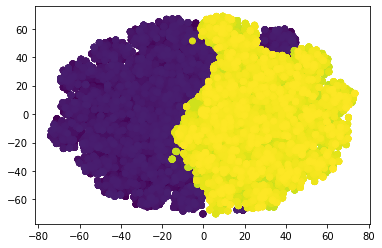

In [11]:
tSNE = TSNE(n_components=2, learning_rate=250)
X_train_tsne = tSNE.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_Y_sr)

plt.show()

In [16]:
train_Y_sr_test = train_Y_sr/1100
train_Y_sr_test

0        0.000909
1        0.000909
2        0.000909
3        0.000909
4        0.000909
           ...   
52279    1.000000
52280    1.000000
52281    1.000000
52282    1.000000
52283    1.000000
Name: ID, Length: 52284, dtype: float64

<ipython-input-22-54b300f55820>:1: DeprecationWarning: This function is deprecated. Please call randint(0, 194 + 1) instead
  colors = np.random.random_integers(0, 194, 52284)


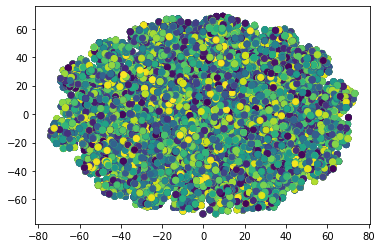